<img src= https://www.digitalhouse.com/logo-DH.png>

# Importamos las librerias a usar 

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Primero vamos a importar el archivo a utilizar

In [3]:
df = pd.read_csv('properatti.csv')

# Vamos a inspeccionarlo

In [4]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [6]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [8]:
df.shape

(121220, 26)

# Vamos a proceder a renombrar las columnas para evitar confusiones cuando trabajemos con los datos

In [9]:
new_names = {'property_type':'tipo_propiedad', 'Barrio':'barrio', 'place_name': 'Barrio',
             'state_name': 'Localidad',   'lat': 'Latitud',       'lon': 'Longitud',
             'currency': 'Moneda',  'expenses': 'Expensas',  'place_with_parent_names':'lugar_con_padres', 'País':'pais', 'Localidad':'localidad', 
                   'Latitud':'latitud', 'Longitud':'longitud', 'price':'precio', 'Moneda':'moneda', 
                  'price_aprox_local_currency':'precio_ARS', 
                  'price_aprox_usd':'precio_USD', 'surface_total_in_m2':'superficie_total_m2', 
                  'surface_covered_in_m2':'sup_cubierta_m2' , 'price_usd_per_m2':'precio_USD_por_m2_total', 
                  'price_per_m2':'precio_por_m2_cubierto', 'floor':'piso', 'rooms':'ambientes', 'Expensas':'expensas'}

In [10]:
new_names

{'property_type': 'tipo_propiedad',
 'Barrio': 'barrio',
 'place_name': 'Barrio',
 'state_name': 'Localidad',
 'lat': 'Latitud',
 'lon': 'Longitud',
 'currency': 'Moneda',
 'expenses': 'Expensas',
 'place_with_parent_names': 'lugar_con_padres',
 'País': 'pais',
 'Localidad': 'localidad',
 'Latitud': 'latitud',
 'Longitud': 'longitud',
 'price': 'precio',
 'Moneda': 'moneda',
 'price_aprox_local_currency': 'precio_ARS',
 'price_aprox_usd': 'precio_USD',
 'surface_total_in_m2': 'superficie_total_m2',
 'surface_covered_in_m2': 'sup_cubierta_m2',
 'price_usd_per_m2': 'precio_USD_por_m2_total',
 'price_per_m2': 'precio_por_m2_cubierto',
 'floor': 'piso',
 'rooms': 'ambientes',
 'Expensas': 'expensas'}

# Ahora llamamos a la funcion rename y a nuestro diccionario

In [12]:
df.rename(columns=new_names,inplace=True)

In [14]:
df.columns

Index(['Unnamed: 0', 'operation', 'tipo_propiedad', 'Barrio',
       'lugar_con_padres', 'country_name', 'Localidad', 'geonames_id',
       'lat-lon', 'Latitud', 'Longitud', 'precio', 'Moneda', 'precio_ARS',
       'precio_USD', 'superficie_total_m2', 'sup_cubierta_m2',
       'precio_USD_por_m2_total', 'precio_por_m2_cubierto', 'piso',
       'ambientes', 'Expensas', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

# Vamos a eliminar coumnas en donde gran parte de sus valores son nulos identificando cuales son esos campos antes de proceder a eliminar los registros duplicados

df.isnull().sum()/121220*100

In [38]:
df.drop(["Unnamed: 0", "operation","properati_url","image_thumbnail","Expensas","piso"],axis=1,inplace=True)

In [39]:
df.shape

(121220, 20)

# Contamos la cantidad de duplicados luego de eliminar la columnas redundandtes

In [44]:
duplicateRowsDF = df[df.duplicated()]

In [45]:
duplicateRowsDF

,tipo_propiedad,Barrio,lugar_con_padres,country_name,Localidad,geonames_id,lat-lon,Latitud,Longitud,precio,Moneda,precio_ARS,precio_USD,superficie_total_m2,sup_cubierta_m2,precio_USD_por_m2_total,precio_por_m2_cubierto,ambientes,description,title
221,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",-34.565265,-58.438233,237895.0,USD,4197538.32,237895.00,69.0,53.0,3447.753623,4488.584906,2.0,El edificio está situado en el barrio de las ...,Ultimas Unidades
245,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
247,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
248,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
249,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
250,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,NaN,NaN,35.0,35.0,NaN,NaN,1.0,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe..."
317,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,430000.0,USD,7587135.00,430000.00,125.0,156.0,3440.000000,2756.410256,NaN,Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....,"Casa 125m² con 3 Plantas en Lezica, Martín 300..."
400,apartment,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,3429760.0,"-34.6179151,-58.3617661",-34.617915,-58.361766,350000.0,USD,6175575.00,350000.00,54.0,50.0,6481.481481,7000.000000,2.0,"En su dique 1, y delimitado por el Boulevard J...",ZenCity 2 Amb piso ALTO! Vista RIO
503,house,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,NaN,245000.0,USD,4322902.50,245000.00,160.0,135.0,1531.250000,1814.814815,NaN,Duplex de buenisimas medidas ( 5X33) Hall de a...,"Casa 160m² con 3 Plantas en Marconi, Ing. 2400..."
705,apartment,Santa Fe,|Argentina|Santa Fe|Santa Fe|,Argentina,Santa Fe,3836277.0,"-31.639488,-60.6853763",-31.639488,-60.685376,NaN,NaN,NaN,NaN,45.0,37.0,NaN,NaN,2.0,Venta de Departamento 1 DORMITORIO en COSTANER...,DEPARTAMENTO EN VENTA


# Elimiamos registros duplicados a partir del nuevo dataframe

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.shape

(115969, 20)

# Evaluacion de las columnas por separado

In [56]:
df.groupby('tipo_propiedad').count()

,Barrio,lugar_con_padres,country_name,Localidad,geonames_id,lat-lon,Latitud,Longitud,precio,Moneda,precio_ARS,precio_USD,superficie_total_m2,sup_cubierta_m2,precio_USD_por_m2_total,precio_por_m2_cubierto,ambientes,description,title
tipo_propiedad,,,,,,,,,,,,,,,,,,,
PH,5618,5618,5618,5618,4889,3809,3809,3809,5165,5165,5165,5165,3474,4780,3205,4497,3125,5618,5618
apartment,66518,66519,66519,66519,58248,40150,40150,40150,57675,57675,57675,57675,47290,56241,41339,50512,30357,66517,66519
house,39739,39761,39761,39761,31119,21588,21588,21588,32476,32475,32476,32476,24182,33042,20174,28126,12485,39761,39761
store,4071,4071,4071,4071,3540,2208,2208,2208,3218,3218,3218,3218,2648,3105,2084,2520,103,4071,4071


# Vamos a descomponer el campo "lugar_con_padres" para obtener mas datos relacionados a zona geografica

In [63]:
lugar=pd.DataFrame(df['lugar_con_padres'].str.split("|",n=6,expand = True))

In [65]:
new_names =  {1: 'Pais',
              2: 'Provincia',
              3: 'LocalBarrio',
              4: 'Barrio2',
              5: 'Barrio3',
              6: 'Barrio4',
             }

In [67]:
lugar.rename(columns=new_names,inplace = True)

# Completamos los barrios en donde estaba vacio

In [69]:
df['Barrio']=df['Barrio'].fillna(value=lugar.Barrio2)
#df.Barrio=df.Barrio.fillna(value=lugar.Barrio2)

In [70]:
df.info() # controlamos que el barrio esta completo en todos los casos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115969 entries, 0 to 121219
Data columns (total 20 columns):
tipo_propiedad             115969 non-null object
Barrio                     115969 non-null object
lugar_con_padres           115969 non-null object
country_name               115969 non-null object
Localidad                  115969 non-null object
geonames_id                97796 non-null float64
lat-lon                    67755 non-null object
Latitud                    67755 non-null float64
Longitud                   67755 non-null float64
precio                     98534 non-null float64
Moneda                     98533 non-null object
precio_ARS                 98534 non-null float64
precio_USD                 98534 non-null float64
superficie_total_m2        77594 non-null float64
sup_cubierta_m2            97168 non-null float64
precio_USD_por_m2_total    66802 non-null float64
precio_por_m2_cubierto     85655 non-null float64
ambientes                  46070 non-null

In [72]:
media = df['sup_cubierta_m2'].mean()
desvio = df['sup_cubierta_m2'].std()
sup_cubierta_out = len(df.loc[df['sup_cubierta_m2']- media >= (3*desvio),['sup_cubierta_m2']])
sup_cubierta_out

162

In [77]:
media = df['superficie_total_m2'].mean()
desvio = df['superficie_total_m2'].std()
sup_total_out = len(df.loc[df['superficie_total_m2']- media >= (3*desvio),['superficie_total_m2']])
sup_total_out

170

# Completamos el campo superficie_total_m2 con el valor del campo precio_por_m2_cubierto en caso de que el primero sea nulo

In [78]:
df['superficie_total_m2']=df['superficie_total_m2'].fillna(value=df.precio_por_m2_cubierto)

# En caso de que la superficie total sea menor a la superficie cubierta voy a tomar esta ultima como superficie total

In [84]:
conditions = [(df['superficie_total_m2'] < df['sup_cubierta_m2'] ) ,(df['superficie_total_m2'] > df['sup_cubierta_m2'] )]

choices = [df['sup_cubierta_m2'],df['superficie_total_m2'] ]

df['superficie_total_m2'] = np.select(conditions, choices, df['superficie_total_m2'])

# Analisis de campos Ambientes

In [90]:
media = df['ambientes'].mean()
desvio = df['ambientes'].std()

len(df.loc[df['ambientes'] > (media + 3*desvio),['ambientes']])

709

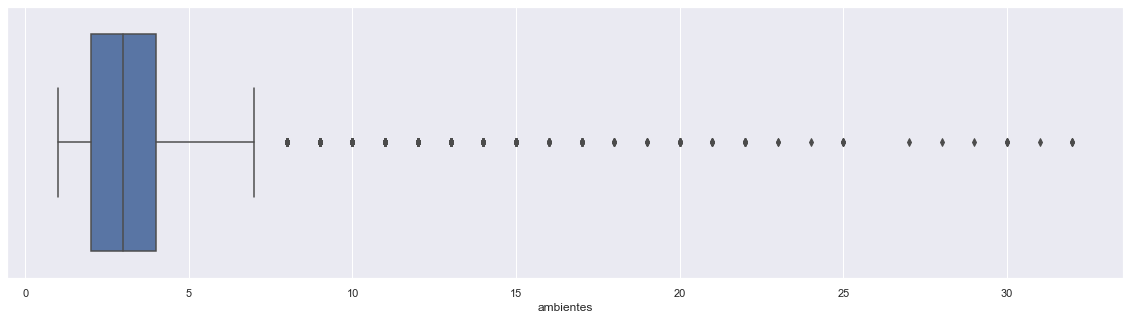

In [91]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 5))
ax.set_xscale("linear")
sns.boxplot(df['ambientes'])
plt.show()

# Verifico tipo de cambio del momento

In [97]:
df['Moneda'].value_counts()

USD    85874
ARS    12656
PEN        2
UYU        1
Name: Moneda, dtype: int64

# Cuidado que tengo muchos valores nulos en esta campo. Elimino los 3 registros en donde la moneda no es dolar o pesos argentinos

In [98]:
df.drop(df[(df.Moneda == 'UYU') | (df.Moneda == 'PEN')].index,inplace = True)

In [99]:
df['verifPrecioUSD'] = round( df['precio'] /df['precio_USD'],3)

In [100]:
df['verifPrecioUSD'].value_counts()

1.000     85874
17.831    12321
17.143      263
17.634       54
17.798        6
17.204        4
17.503        3
17.404        2
17.427        1
17.467        1
17.405        1
Name: verifPrecioUSD, dtype: int64